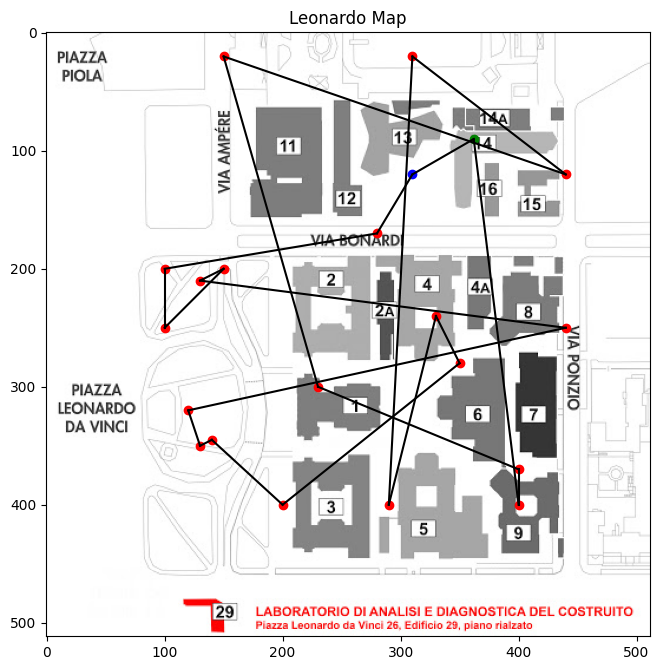

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread("poli2.jpg")
fig = plt.figure(figsize = (12,8), dpi = 100, facecolor = 'w', edgecolor = 'k')
plt.title("Leonardo Map") 

positions = [[362,90],[310,120],[280,170],[100,200],[100,250],[150,200],[130,210],[440,250],[120,320],
             [130,350],[140,345],[200,400],[350,280],[330,240],[290,400],[310,20],[440,120],[150,20],
             [230,300],[400,370],[400,400],[362,90]]
# visualizza il percorso del drone che può muoversi ovunque
def trajectory(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x2],[y1,y2],'k-')

# visualizza il percorso del drone che può muoversi solo in linea retta
def trajectory_MAE(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x1],[y1,y2],'k-')
        plt.plot([x1,x2],[y2,y2],'k-')

trajectory(positions)
plt.imshow(img)
# visualizza l'immagine

In [2]:
def MSE(pos):
    somma = 0
    for i in range(1,len(pos)):
        somma += (pos[i][0] - pos[i-1][0]) ** 2 + (pos[i][1] - pos[i-1][1]) ** 2
    
    return (1 / len(pos)) * somma

def MAE(pos):
    somma = 0
    for i in range(1,len(pos)):
        somma += abs(pos[i][0] - pos[i-1][0]) + abs(pos[i][1] - pos[i-1][1])
    
    return (1 / len(pos)) * somma
    

In [3]:
def performance(pos,metrics):
    loss = metrics(pos)
    return(loss)
    
print(f"MSE = {performance(positions,MSE)}")
print(f"MAE = {performance(positions,MAE)}")

MSE = 36818.09090909091
MAE = 181.36363636363637


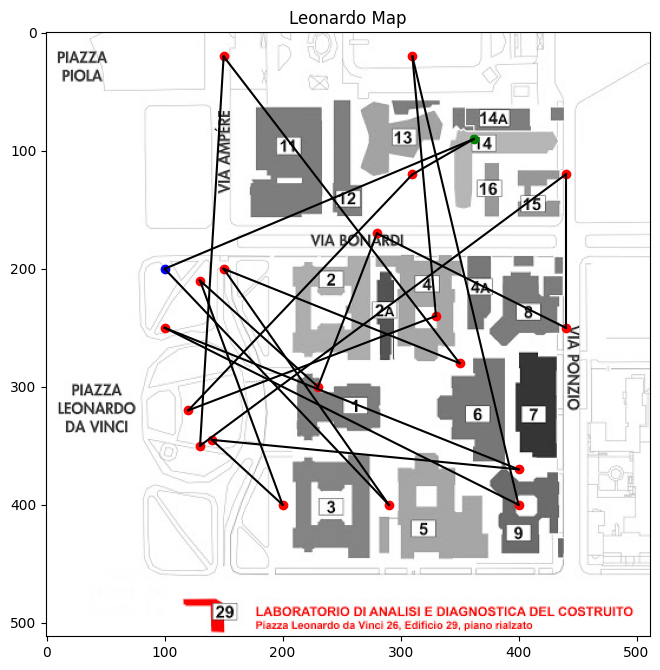

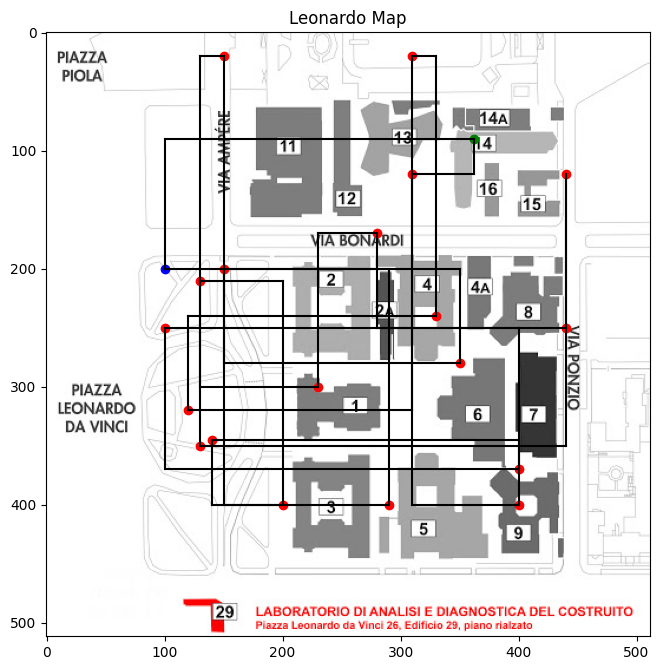

In [4]:
import random

class Random_Optimizer:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = [positions[0]]

    def scheduler(self):
        arr = positions.copy()
        arr.remove(positions[0]) #Rimuovo posizione iniziale e finale da arr per il random.choice
        arr.remove(positions[-1])
        for i in range(len(positions)-2):
            newPos = random.choice(arr)
            self.schedule.extend([newPos])
            arr.remove(newPos)
        
        self.schedule.extend([positions[-1]]) #aggiungo la posizione finale = posizione iniziale
        return(self.schedule)

    def plot(self):
        img = plt.imread("poli2.jpg")
        fig = plt.figure(figsize = (12,8), dpi = 100, facecolor = 'w', edgecolor = 'k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')
        
        plt.imshow(img)

    def plot_MAE(self):
        img = plt.imread("poli2.jpg")
        fig = plt.figure(figsize = (12,8), dpi = 100, facecolor = 'w', edgecolor = 'k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')
        
        plt.imshow(img)
        
trajectory = Random_Optimizer(positions)
trajectory.scheduler()
trajectory.plot()
trajectory.plot_MAE()

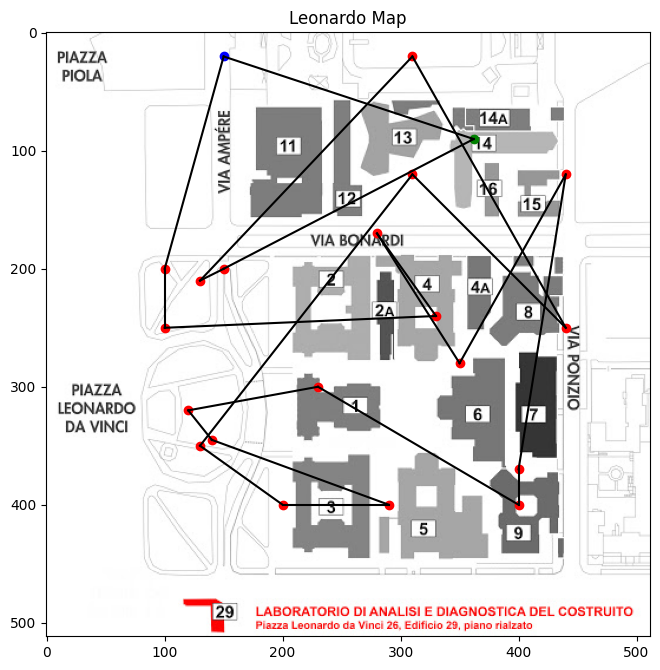

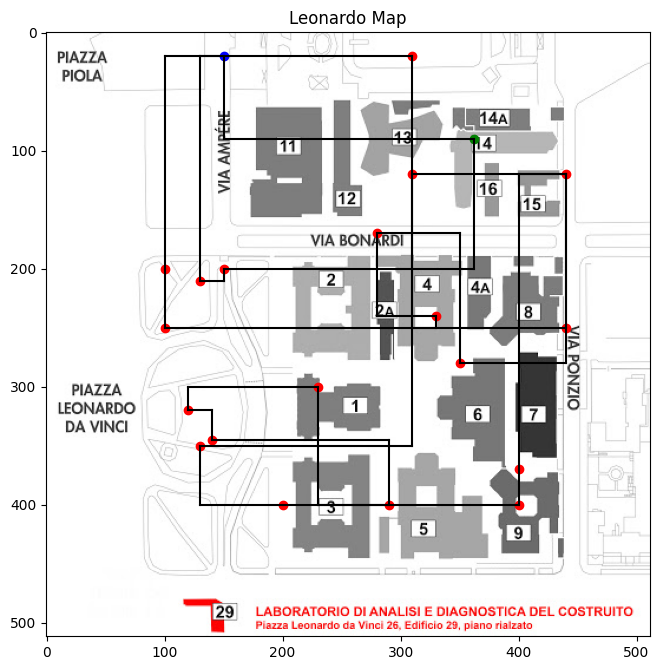

In [5]:
"""Questo è un programma più corto provando ad ottimizzare il percorso scegliendo il percorso
con la lunghezza totale più corta tra un campionamento di j percorsi"""
import random

class Random_Optimizer_piu_corto:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = []

    def scheduler(self):
        percorsi = [] #vettore per escludere percorsi già visti
        j = 0
        while j < 1000: #finché non trovo j percorsi diversi
            percorsi.append([positions[0]])
            arr = positions.copy()
            arr.remove(positions[0])
            arr.remove(positions[-1])
            newPercorso = []
            for i in range(len(positions) - 2):
                newPos = random.choice(arr)
                newPercorso.extend([newPos])
                arr.remove(newPos)
            
            newPercorso.extend([positions[-1]])
            if newPercorso not in percorsi: # escludo newPercorso se il random l'ha già fatto
                percorsi[j].extend(newPercorso)
                lunghezza = 0
                for i in range(1,len(positions)): # calcolo la lunghezza del percorso
                    lunghezza += ((percorsi[j][i][0] - percorsi[j][i-1][0]) ** 2 + 
                                  (percorsi[j][i][1] - percorsi[j][i-1][1]) ** 2) ** 0.5
                
                if j == 0:
                    minLungh = lunghezza # inizializzo la variabile lunghezza minima (minLungh) come la 
                                         # prima lunghezza che trovo
                if lunghezza < minLungh and j != 0: # scelgo il percorso più corto
                    self.schedule = percorsi[j].copy()
                    minLungh = lunghezza
                    
                j += 1
        
        return(self.schedule)

    def plot(self):
        img = plt.imread("poli2.jpg")
        fig = plt.figure(figsize = (12,8), dpi = 100, facecolor = 'w', edgecolor = 'k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')
        
        plt.imshow(img)

    def plot_MAE(self):
        img = plt.imread("poli2.jpg")
        fig = plt.figure(figsize = (12,8), dpi = 100, facecolor = 'w', edgecolor = 'k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')
        
        plt.imshow(img)

trajectory = Random_Optimizer_piu_corto(positions)
trajectory.scheduler()
trajectory.plot()
trajectory.plot_MAE()

In [11]:
class Greedy_Optimizer(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions) # non toccare, uso il constructor della classe padre
        self.loss = loss

    def scheduler(self):
        arr = positions.copy()
        arr.remove(positions[0])
        arr.remove(positions[-1])
        newPos = arr
        for i in range(len(positions)-2):
            for j in range(len(arr)):
                dist = performance([self.schedule[i],arr[j]],self.loss)
                if j == 0:
                    bestDist = dist
                    
                if dist < bestDist and j != 0:
                    newPos = arr[j]
            
            self.schedule.extend([newPos])
            arr.remove(newPos)
        
        self.schedule.extend([positions[-1]])
        return(self.schedule)

In [10]:
random.seed(0)

metrics = MSE

D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)


print(f"Performance of Random_Opt = {performance(D1.scheduler(), metrics)}")
print(f"Performance of Initial schedule = {performance(positions, metrics)}")
print(f"Performance of Greedy_Opt = {performance(D2.scheduler(), metrics)}")


D2.plot()
D2.plot_MAE()
plt.imshow(img)



Performance of Random_Opt = 57261.72727272727
Performance of Initial schedule = 36818.09090909091


ValueError: ignored

In [8]:
metrics = MSE
D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)

%timeit performance(D1.scheduler(), metrics)
%timeit performance(D2.scheduler(), metrics)

1000 loops, best of 3: 25.5 ms per loop


UnboundLocalError: ignored